<a href="https://colab.research.google.com/github/Zaxzz/kecerdasan_buatan/blob/main/Supervise_Learning_Regression_dan_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervise Learning Regression dan Classification

1. Decision Tree

In [ ]:
import pandas as pd

# Membaca file iris.csv
iris = pd.read_csv('Iris.csv')
# Melihat informasi dataset
iris.info()

# melihat informasi dataset pada 5 baris pertama
iris.head()
iris.drop('Id',axis=1,inplace=True)
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
y = iris['Species']

# Membagi dataset menjadi data latih & data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
from sklearn.tree import DecisionTreeClassifier

# membuat model Decision Tree
tree_model = DecisionTreeClassifier()

# Melatih model dengan menggunakan data latih
tree_model = tree_model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score

y_pred = tree_model.predict(X_test)

acc_secore = round(accuracy_score(y_pred, y_test), 3)

print('Accuracy: ', acc_secore)
print(tree_model.predict([[6.2, 3.4, 5.4, 2.3]])[0])
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file = "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
Accuracy:  0.933
Iris-virginica


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## 2. Linear Regression

Jumlah kamar: 6
Prediksi harga kamar: 102110.16949152542

Jumlah kamar: 7
Prediksi harga kamar: 119542.37288135593



1.0

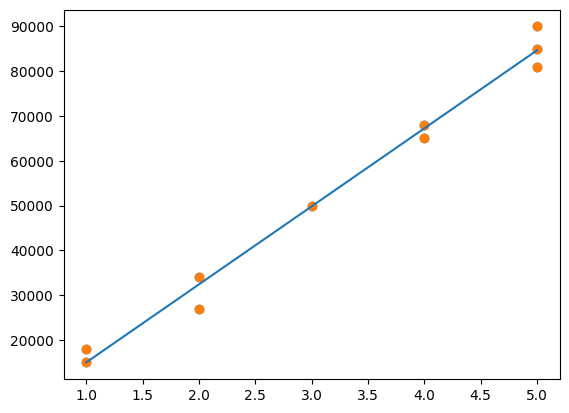

In [ ]:
import numpy as np

#buat data jumlah kamar
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])

#data harga rumah. asumsi dalam dollar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])


# menampilkan scatter plot dari dataset
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(bedrooms, house_price)
from sklearn.linear_model import LinearRegression

# latih model dengan Linear Regression.fit()
bedrooms = bedrooms.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)
plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, linreg.predict(bedrooms))
# Data testing
# Jumlah kamar yang ingin diprediksi harganya
X_test = np.array([[6], [7]])

# Melakukan prediksi harga kamar
y_pred = linreg.predict(X_test)

# Menampilkan hasil prediksi
for i in range(len(X_test)):
    print("Jumlah kamar:", X_test[i][0])
    print("Prediksi harga kamar:", y_pred[i])
    print()
# uji akurasi model
linreg.score(X_test, y_pred)


## 3. Logistic Regression

In [2]:
import pandas as pd

# membaca dataset dan mengubahnya menjadi dataframe
df = pd.read_csv('Social_Network_Ads.csv')
df.head()
df.head()
# drop kolom yang tidak diperlukan
data = df.drop(columns=['User ID'])

# jalankan proses one-hot encoding dengan pd.get_dummies()
data = pd.get_dummies(data)
data
# pisahkan atribut dan label
predictions = ['Age' , 'EstimatedSalary' , 'Gender_Female' , 'Gender_Male']
X = data[predictions]
y = data['Purchased']
# lakukan normalisasi terhadap data yang kita miliki
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data = pd.DataFrame(scaled_data, columns= X.columns)
scaled_data.head()
from sklearn.model_selection import train_test_split

# bagi data menjadi train dan test untuk setiap atribut dan label
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=1)
from sklearn import linear_model

# latih model dengan fungsi fit
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
# uji akurasi model
model.score(X_test, y_test)



0.825

# Praktikum

## 1. Algoritma Decision Tree dan Logistic Regression untuk memprediksi transaksi


Decision Tree Evaluation:
Accuracy: 0.84
Precision: 0.80
Recall: 0.71
F1 Score: 0.75


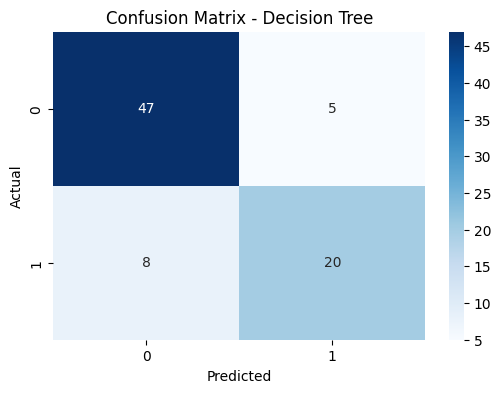


Logistic Regression Evaluation:
Accuracy: 0.89
Precision: 0.91
Recall: 0.75
F1 Score: 0.82


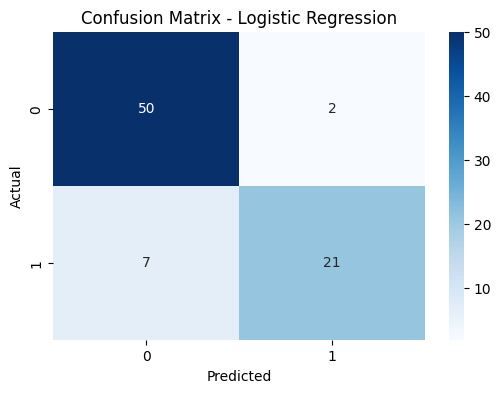

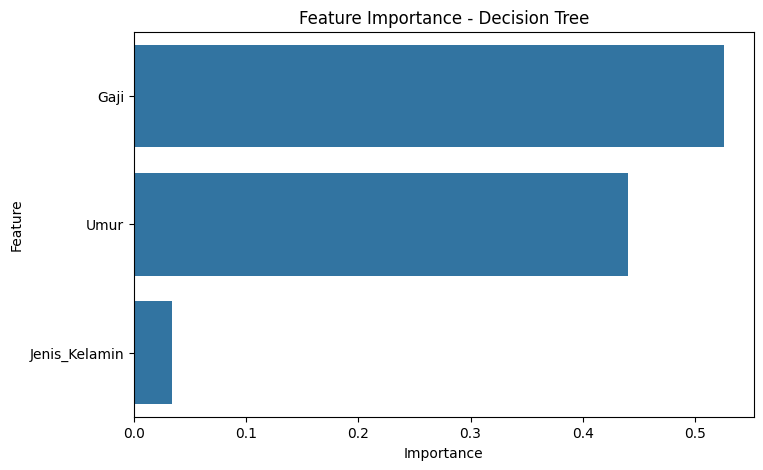

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('iklan_sosmed.csv', sep=';')

# Preprocessing
# Drop ID column as it's not relevant for prediction
data = data.drop('ID', axis=1)

# Encode categorical variable 'Jenis_Kelamin'
le = LabelEncoder()
data['Jenis_Kelamin'] = le.fit_transform(data['Jenis_Kelamin'])

# Define features (X) and target (y)
X = data[['Jenis_Kelamin', 'Umur', 'Gaji']]
y = data['Transaksi']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train[['Umur', 'Gaji']] = scaler.fit_transform(X_train[['Umur', 'Gaji']])
X_test[['Umur', 'Gaji']] = scaler.transform(X_test[['Umur', 'Gaji']])

# Initialize models
dt_model = DecisionTreeClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)

# Train models
dt_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

# Evaluate models
def evaluate_model(y_test, predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Evaluate Decision Tree
evaluate_model(y_test, dt_predictions, "Decision Tree")

# Evaluate Logistic Regression
evaluate_model(y_test, lr_predictions, "Logistic Regression")

# Feature Importance for Decision Tree
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance - Decision Tree')
plt.show()

## 2. Algoritma Linear Regression untuk memprediksi gaji pegawai

Mean Squared Error (MSE): 11,211,771,792,579,374.00
Root Mean Squared Error (RMSE): 105,885,654.33
R² Score: 0.90
Intersep: 379,823,745.18
Kemiringan (Tahun_Pengalaman): 141,357,229.85


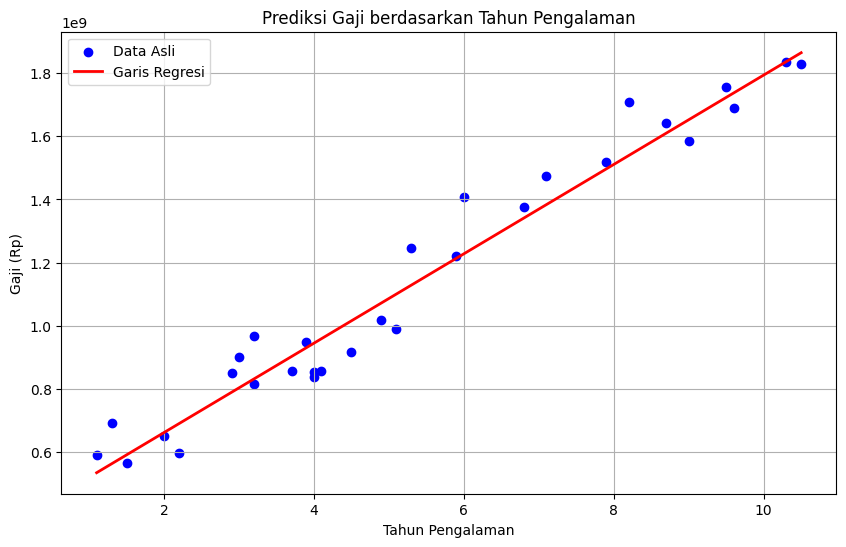

Prediksi gaji untuk 5 tahun pengalaman: Rp 1,086,609,894.40


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Muat dataset
data = pd.read_csv('Data_Gaji.csv', sep=';')

# Tentukan fitur (X) dan target (y)
X = data[['Tahun_Pengalaman']].values
y = data['Gaji'].values

# Bagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Regresi Linear
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Lakukan prediksi
y_pred = model_lr.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"R² Score: {r2:.2f}")

# Cetak koefisien model
print(f"Intersep: {model_lr.intercept_:,.2f}")
print(f"Kemiringan (Tahun_Pengalaman): {model_lr.coef_[0]:,.2f}")

# Visualisasi garis regresi
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Asli')
plt.plot(X, model_lr.predict(X), color='red', linewidth=2, label='Garis Regresi')
plt.xlabel('Tahun Pengalaman')
plt.ylabel('Gaji (Rp)')
plt.title('Prediksi Gaji berdasarkan Tahun Pengalaman')
plt.legend()
plt.grid(True)
plt.show()

# Contoh prediksi
pengalaman_contoh = np.array([[5.0]])  # Contoh: 5 tahun pengalaman
gaji_prediksi = model_lr.predict(pengalaman_contoh)
print(f"Prediksi gaji untuk 5 tahun pengalaman: Rp {gaji_prediksi[0]:,.2f}")

## 4. Parameter tunning pada masing-masing algoritma untuk meningkatkan akurasi

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Muat dataset
data = pd.read_csv('iklan_sosmed.csv', sep=';')

# Preprocessing
data = data.drop('ID', axis=1)
le = LabelEncoder()
data['Jenis_Kelamin'] = le.fit_transform(data['Jenis_Kelamin'])
X = data[['Jenis_Kelamin', 'Umur', 'Gaji']]
y = data['Transaksi']

# Bagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skala fitur numerik
scaler = StandardScaler()
X_train[['Umur', 'Gaji']] = scaler.fit_transform(X_train[['Umur', 'Gaji']])
X_test[['Umur', 'Gaji']] = scaler.transform(X_test[['Umur', 'Gaji']])

# Tuning Decision Tree
dt_param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_model = DecisionTreeClassifier(random_state=42)
dt_grid = GridSearchCV(dt_model, dt_param_grid, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)

# Tuning Logistic Regression
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200]
}
lr_model = LogisticRegression(random_state=42)
lr_grid = GridSearchCV(lr_model, lr_param_grid, cv=5, scoring='accuracy')
lr_grid.fit(X_train, y_train)

# Prediksi dan evaluasi
dt_best = dt_grid.best_estimator_
lr_best = lr_grid.best_estimator_
dt_pred = dt_best.predict(X_test)
lr_pred = lr_best.predict(X_test)

# Cetak hasil
print("Decision Tree - Parameter Terbaik:", dt_grid.best_params_)
print(f"Akurasi Decision Tree: {accuracy_score(y_test, dt_pred):.2f}")
print("\nLogistic Regression - Parameter Terbaik:", lr_grid.best_params_)
print(f"Akurasi Logistic Regression: {accuracy_score(y_test, lr_pred):.2f}")

Decision Tree - Parameter Terbaik: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Akurasi Decision Tree: 0.91

Logistic Regression - Parameter Terbaik: {'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'}
Akurasi Logistic Regression: 0.89


Linear Regression - Parameter Terbaik: {'fit_intercept': True}
R² Score Linear Regression: 0.90
RMSE Linear Regression: 105,885,654.33

Polynomial Regression - Parameter Terbaik: {'polynomialfeatures__degree': 1}
R² Score Polynomial Regression: 0.90
RMSE Polynomial Regression: 105,885,654.33


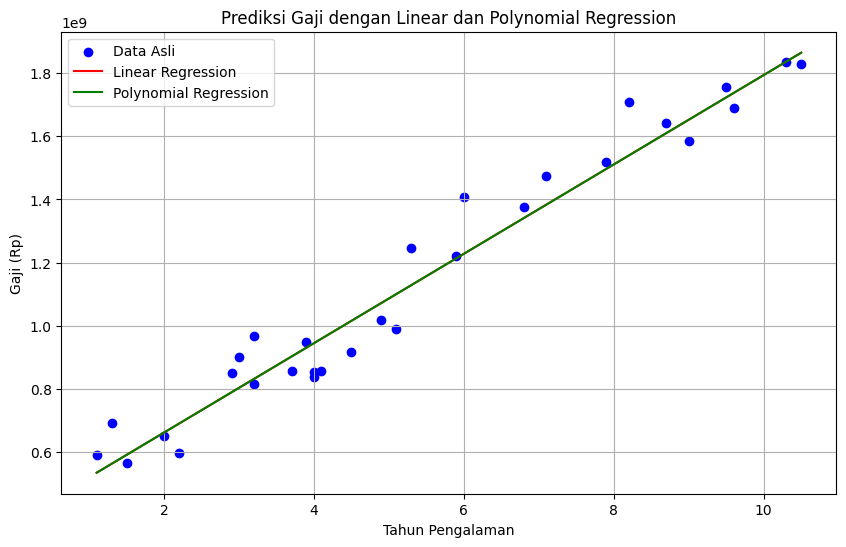

Prediksi gaji (Linear Regression) untuk 5 tahun: Rp 1,086,609,894.40
Prediksi gaji (Polynomial Regression) untuk 5 tahun: Rp 1,086,609,894.40


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Muat dataset
data = pd.read_csv('Data_Gaji.csv', sep=';')

# Tentukan fitur (X) dan target (y)
X = data[['Tahun_Pengalaman']].values
y = data['Gaji'].values

# Bagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tuning Linear Regression
lr_param_grid = {
    'fit_intercept': [True, False]
}
lr_model = LinearRegression()
lr_grid = GridSearchCV(lr_model, lr_param_grid, cv=5, scoring='r2')
lr_grid.fit(X_train, y_train)

# Tuning Polynomial Regression
degree_param_grid = {'polynomialfeatures__degree': [1, 2, 3, 4]}
polyreg = make_pipeline(PolynomialFeatures(), LinearRegression())
poly_grid = GridSearchCV(polyreg, degree_param_grid, cv=5, scoring='r2')
poly_grid.fit(X_train, y_train)

# Prediksi dan evaluasi
lr_best = lr_grid.best_estimator_
lr_pred = lr_best.predict(X_test)
poly_best = poly_grid.best_estimator_
poly_pred = poly_best.predict(X_test)

# Cetak hasil evaluasi
print("Linear Regression - Parameter Terbaik:", lr_grid.best_params_)
print(f"R² Score Linear Regression: {r2_score(y_test, lr_pred):.2f}")
print(f"RMSE Linear Regression: {np.sqrt(mean_squared_error(y_test, lr_pred)):,.2f}")

print("\nPolynomial Regression - Parameter Terbaik:", poly_grid.best_params_)
print(f"R² Score Polynomial Regression: {r2_score(y_test, poly_pred):.2f}")
print(f"RMSE Polynomial Regression: {np.sqrt(mean_squared_error(y_test, poly_pred)):,.2f}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Asli')
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
plt.plot(X_range, lr_best.predict(X_range), color='red', label='Linear Regression')
plt.plot(X_range, poly_best.predict(X_range), color='green', label='Polynomial Regression')
plt.xlabel('Tahun Pengalaman')
plt.ylabel('Gaji (Rp)')
plt.title('Prediksi Gaji dengan Linear dan Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()

# Contoh prediksi
pengalaman_contoh = np.array([[5.0]])
print(f"Prediksi gaji (Linear Regression) untuk 5 tahun: Rp {lr_best.predict(pengalaman_contoh)[0]:,.2f}")
print(f"Prediksi gaji (Polynomial Regression) untuk 5 tahun: Rp {poly_best.predict(pengalaman_contoh)[0]:,.2f}")